In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel(r"D:\Jupyter\Data Science\ML\SUPERVISIED LEARNING\CLASSIFICATION\CANCER DATASET\cancer.xlsx")
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2133,5.0,6.5,1
2134,3.4,6.6,0
2135,2.7,6.5,0
2136,3.3,5.6,0


In [3]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

ypred_train = log_reg.predict(X_train)

# train accuarcy
from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(y_train,ypred_train))

# crossvalidation score
from sklearn.model_selection import cross_val_score
print('cvscore',cross_val_score(log_reg,X_train,y_train,cv=5,scoring ='accuracy').mean())

ypred_test = log_reg.predict(X_test)
print('testaccuracy',accuracy_score(y_test,ypred_test))


train accuracy 0.8456140350877193
cvscore 0.8444444444444444
testaccuracy 0.8387850467289719


In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[169,  31],
       [ 38, 190]], dtype=int64)

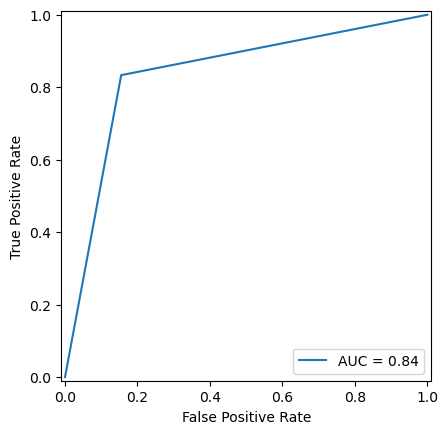

In [7]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [8]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.8391666666666667